# Fine-Tuning Transformer Models

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 31.5 MB/s eta 0:00:00


## Learning Tokenizer class: AutoTokenizer

### Basics

AutoTokenizer is a generic class for the tokenizers in hugging face Transformer library. Instead of using Specific tokenizers from the library, we can use this to make our code more generic. It will download the tokenizer you specify

In [ ]:
from transformers import AutoTokenizer
checkpoint='bert-base-cased'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
tokenizer("hello world")

{'input_ids': [101, 19082, 1362, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
save=tokenizer("hello rafay")

In [ ]:
save

{'input_ids': [101, 19082, 187, 9823, 4164, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

We got three keys in the dictionary.

* First, is the input_ids that corresponds to the integer ids of the tokens, Since the tokenizers can be of different types such as word tokenizer, character tokenizer or sub-word tokenizers, the length will not always be same as the no of tokens or characters.
* Second is the token_type_ids
* Third is attention_mask, These tell our models where to look and where to ignore the inputs. Where the attention mask is 0, our model will ignore those tokens
* These might be present for some models and not for others. Like token_type_ids will be present for BERT but not DistilBERT

### Functions for step by step

In [ ]:
# we can do this step by step just to get more
# indepth knowledge of what's happening inside them
tokenized=tokenizer.tokenize("hello world")
print(tokenized)
ids=tokenizer.convert_tokens_to_ids(tokenized)
print(ids)
# these steps can be done together using the encode method but it also
# adds the model specific tokens such as [CLS] and [SEP]
ids=tokenizer.encode('hello world')
print(ids)
# decoding the ids back to tokens
tokens=tokenizer.convert_ids_to_tokens(ids)
print(tokens)
# decoding the ids back to string
text=tokenizer.decode(ids)
print(text)

['hello', 'world']
[19082, 1362]
[101, 19082, 1362, 102]
['[CLS]', 'hello', 'world', '[SEP]']
[CLS] hello world [SEP]


The tokenizer returned dictionaries but you can get them in these types as well

* "pt" pytorch tensor
* "tf" tensorflow tensor
* 'np' as numpy

In [ ]:
tokenizer("hello world",return_tensors='np')

{'input_ids': array([[  101, 19082,  1362,   102]]), 'token_type_ids': array([[0, 0, 0, 0]]), 'attention_mask': array([[1, 1, 1, 1]])}

In [ ]:
tokenizer("hello world",return_tensors='tf')

{'input_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[  101, 19082,  1362,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 1]], dtype=int32)>}

In [ ]:
tokenizer("hello world",return_tensors='pt')

{'input_ids': tensor([[  101, 19082,  1362,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

### Multiple inputs

Why the error occurs? because there is no such things as ragged tensors, they should be of the same length, so you'll need to pass truncate and padding parameter to convert all the sentences to same shape

In [ ]:
data=[
    'I like cats.',
    'Do you like cats too?',
]
# model_inputs=tokenizer(data) # Works, but model won't accept
# model_inputs=tokenizer(data,return_tensors='pt') # Error

In [ ]:
# Now, it will pad the short sentences and truncate the longer one
# if needed
model_inputs=tokenizer(data,return_tensors='pt',truncation=True,padding=True)
print(model_inputs)

{'input_ids': tensor([[  101,   146,  1176, 11771,   119,   102,     0,     0],
        [  101,  2091,  1128,  1176, 11771,  1315,   136,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}


## Learning AutoModelForSequenceClassification

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained(checkpoint)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


```Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.```

What does this warning mean? This shows that the head of the model which was being used for another task has been cut and the body remains the same. A new head is added which is a dense layer with K neurons. By default, the K is 2 which can be changed by specifying **num_labels** parameter

In [ ]:
outputs=model(**model_inputs)

In [ ]:
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1157,  0.4246],
        [-0.0649,  0.4632]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


What we get as outputs are the **logits(fancy name for values before applying the softmax)**
Softmax converts the output of a layer into probability distribution

In [ ]:
print(outputs.logits)
print(outputs[0])
print(outputs['logits'])
print(outputs.logits.detach().cpu().numpy())
# get logits, detach from gradient, copy it to cpu and convert to numpy

tensor([[-0.1157,  0.4246],
        [-0.0649,  0.4632]], grad_fn=<AddmmBackward0>)
tensor([[-0.1157,  0.4246],
        [-0.0649,  0.4632]], grad_fn=<AddmmBackward0>)
tensor([[-0.1157,  0.4246],
        [-0.0649,  0.4632]], grad_fn=<AddmmBackward0>)
[[-0.11572424  0.4246305 ]
 [-0.06491487  0.4632028 ]]


## What is Transfer Learning and Fine Tuning

* Transfer learning without fine-tuning
* Fine tuning without transfer learning
* Transfer learning with fine-tuning and transfer learning via fine-tuning

**Greedy Layer-Wise pretraining**

* In early days, activation functions like sigmoid/tanh were used and they led to the vanishing gradient problem when training a neural network end-to-end
* A method was introduced to train each layer separately.

* Consider an autoencoder (a model that learns to output its inputs), we train it on a dataset. We take it's intermediate representation z1 and throw away the second half of the network and now we train another autoencoder on the intermediate representation and keep going, we can add final dense layer at the end.
* Then we train the whole model including the previous layers and the dense layer but using a smaller learning rate.
* This network produced results better than those networks that were trained only end-to-end

* What does this example show? it shows that **"Fine Tuning"** isn't always related with transfer learning. Here we are performing fine tuning but without transfer learning.

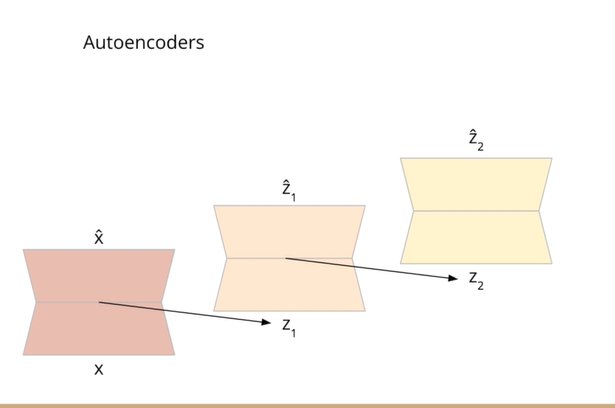

There's also another way where we don't train the head first and just train it with the whole network.
 * **Remember: Nothing is set in stone.** You can try different things, some might work better for you.

 * Another paper showed that training only the bias terms (or even a subset) can match or exceed the performance of full fine tuning.

## Fine Tuning: Sentiment Analysis

### HuggingFace Dataset library

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
import numpy as np

### Load Dataset

In [ ]:
## amazon_polarity dataset us also for sentiment analysis

In [ ]:
raw_datasets=load_dataset("glue","sst2")

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

It returns a dictionary of datasets divided into training, validation and test

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [ ]:
raw_datasets['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

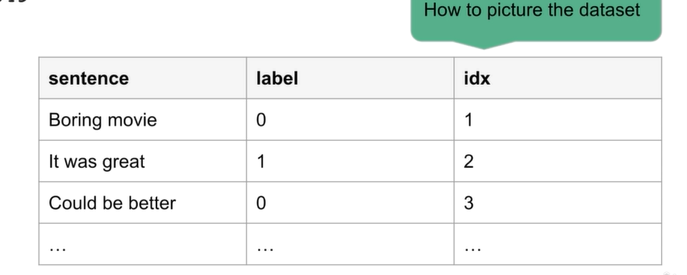

In [ ]:
type(raw_datasets['train'])

datasets.arrow_dataset.Dataset

In [ ]:
dir(raw_datasets['train'])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_with_indices_mappin

In [ ]:
raw_datasets['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [ ]:
raw_datasets['train'][0]

{'sentence': 'hide new secretions from the parental units ',
 'label': 0,
 'idx': 0}

In [ ]:
raw_datasets['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

### Tokenization with datasets: AutoTokenizer

There is a weird thing going on in this function we are not applying padding but just truncation, the trainer object from the library handles with padding so there is no need to do it

In [ ]:
from transformers import AutoTokenizer
# checkpoint= "bert-base-cased"
# distilbert trains faster
checkpoint="distilbert-base-uncased"
tokenizer= AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
tokenized_sentences=tokenizer(raw_datasets['train'][0:3]['sentence'])
from pprint import pprint
pprint(tokenized_sentences)

{'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102],
               [101,
                3397,
                2053,
                15966,
                1010,
                2069,
                4450,
                2098,
                18201,
                2015,
                102],
               [101,
                2008,
                7459,
                2049,
                3494,
                1998,
                10639,
                2015,
                2242,
                2738,
                3376,
                2055,
                2529,
                3267,
                102]]}


In [ ]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'],truncation=True)

tokenized_dataset=raw_datasets.map(tokenize_fn,batched=True)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

### Training Arugments

In [ ]:
from transformers import TrainingArguments

This is like a training configuration object

In [ ]:
training_args= TrainingArguments('my_trainer',
                                 evaluation_strategy='epoch',
                                 save_strategy='epoch',
                                 num_train_epochs=1)

#save_strategy by default saves the model on each timestep

### Metrics

In [ ]:
from datasets import load_metric

metric= load_metric('glue','sst2')

# can also load specific metrics

#metric= load_metric('f1')
#metric= load_metric('bleu')

<ipython-input-34-1bc59d484175>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric= load_metric('glue','sst2')


In [ ]:
def compute_metrics(logits_and_labels):
  metric=load_metric("glue","sst2")
  logits,labels=logits_and_labels
  predictions=np.argmax(logits,axis=-1)
  return metric.compute(predictions=predictions,references=labels)

In [ ]:
metric.compute(predictions=[1,0,1], references=[1,0,0])

{'accuracy': 0.6666666666666666}

### Model

In [ ]:
from transformers import AutoModelForSequenceClassification

model=AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                         num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
# only works on cpu
#summary(model,input_size=(16,512), dtypes=['torch.IntTensor'],device='cpu')
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

In [ ]:
# just to confirm the weights later, whether they save changed or not
params_before=[]
for name,p in model.named_parameters():
  params_before.append(p.detach().cpu().numpy())

### Trainer

In [ ]:
from transformers import Trainer

trainer=Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.213200,0.349110,0.904817


TrainOutput(global_step=8419, training_loss=0.264644761906198, metrics={'train_runtime': 470.3113, 'train_samples_per_second': 143.201, 'train_steps_per_second': 17.901, 'total_flos': 518596929468840.0, 'train_loss': 0.264644761906198, 'epoch': 1.0})

In [ ]:
trainer.save_model("my_saved_model_path")

In [ ]:
from transformers import pipeline
clf=pipeline('text-classification',model='my_saved_model_path',device=0)

In [ ]:
clf('This movie is awesome')

[{'label': 'LABEL_1', 'score': 0.998968243598938}]

In [ ]:
clf("This movie sucks")

[{'label': 'LABEL_0', 'score': 0.9966576099395752}]

### Changing the Generic Labels

We can see from the model output that `[{'label': 'LABEL_0', 'score': 0.9982225298881531}]` the label names are quite generic `LABEL_0` and `LABEL_1`, changing it to some meaningful names will help

In [ ]:
!cat my_saved_model_path/config.json

{
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.32.1",
  "vocab_size": 30522
}


In [ ]:
import json

In [ ]:
config_path='my_saved_model_path/config.json'

with open(config_path) as f:
  j = json.load(f)

j['id2label']= {0:'negative',1:'positive'}

with open(config_path,'w') as f:
  json.dump(j,f,indent=2)

In [ ]:
!cat my_saved_model_path/config.json

{
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.32.1",
  "vocab_size": 30522,
  "id2label": {
    "0": "negative",
    "1": "positive"
  }
}

In [ ]:
clf= pipeline('text-classification',model='my_saved_model_path',device=0)

In [ ]:
clf('This movie is good')

[{'label': 'positive', 'score': 0.9990053772926331}]

### Comparing the parameters before and after

In [ ]:
params_after=[]
for name,p in model.named_parameters():
  params_after.append(p.detach().cpu().numpy())

In [ ]:
for p1,p2 in zip(params_before,params_after):
  print(np.sum(np.abs(p1-p2)))

13303.753
89.75106
1.7130709
1.1315522
1307.3729
1.7217941
1293.1903
0.0030612014
1192.3197
1.069221
1127.1129
0.818415
1.7032332
0.81559217
4941.08
5.6972923
4530.828
0.7328278
1.5892863
0.6830728
1256.3373
1.5025184
1244.6677
0.003161064
1097.1044
0.81728435
1049.5505
0.7320031
1.5749636
0.73078793
4875.1265
5.414797
4441.099
0.6713344
1.4282387
0.7354727
1258.5199
1.5150467
1270.4958
0.0026412024
1094.7488
0.74976104
1089.8499
0.7247991
1.4558747
0.782705
4883.1465
5.4705553
4341.576
0.6965425
1.4125599
0.6601586
1287.1721
1.4282153
1302.4401
0.0031860895
1146.448
0.69943464
1101.9666
0.6922081
1.4086015
0.68425035
4764.8784
5.343216
4082.8853
0.74308884
1.2863039
0.6976103
1185.4353
1.5154977
1174.5879
0.001936299
953.5134
0.78348374
968.82526
0.9676889
1.3590024
0.91665703
4327.092
5.098719
3377.715
0.75806004
1.2775408
0.70569676
1124.2074
1.3984046
1149.0922
0.0012701114
911.46643
0.73146653
905.94934
0.8953213
1.2869005
1.084619
3401.369
4.2897015
3082.7993
0.94139946
1.3049061

## Fine-Tuning Sentiment Custom Dataset

### Installing and importing some libraries

In [ ]:
!pip install transformers datasets

In [ ]:
!pip install torchinfo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

### Getting the dataset

In [ ]:
!wget https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-09-02 19:41:04--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  1.58MB/s    in 2.1s    

2023-09-02 19:41:08 (1.58 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



### Loading the dataset

In [ ]:
df_ =pd.read_csv('AirlineTweets.csv')

In [ ]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df= df_[['airline_sentiment','text']].copy()

<Axes: >

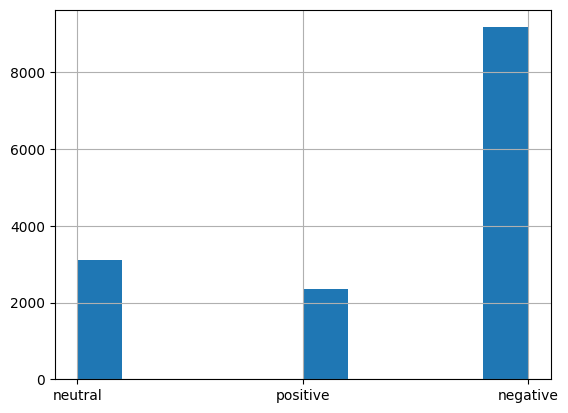

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
target_map= {'positive':1,'negative':0,'neutral':2}
df['target']=df['airline_sentiment'].map(target_map)

for it to work with the hugging face library we must name the label column or target column `label`

In [ ]:
df2=df[['text','target']]
df2.columns=['sentence','label']
df2.to_csv('data.csv',index=None)

In [ ]:
from datasets import load_dataset

raw_dataset= load_dataset('csv',data_files='data.csv')
# for multiple files use a list ['file1.csv','file2'.csv]
# if already split data_files={'train':['train1.csv','train2.csv'],
#                               'test':'test.csv'}
# all of these paths can be urls

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [ ]:
split= raw_dataset['train'].train_test_split(test_size=0.3,seed=42)

In [ ]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

### Loading tokenizer

In [ ]:
checkpoint='distilbert-base-cased'

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'],truncation=True)

In [ ]:
tokenized_datasets=split.map(tokenize_fn,batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

### Specifying TrainingArgs and Config

In [ ]:
training_args=TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy='epoch',
    save_strategy = 'epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64
)


In [ ]:
from transformers import AutoConfig

In [ ]:
config=AutoConfig.from_pretrained(checkpoint)

In [ ]:
config

DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.32.1",
  "vocab_size": 28996
}

In [ ]:
config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [ ]:
config.label2id

{'LABEL_0': 0, 'LABEL_1': 1}

In [ ]:
config.id2label = {v:k for k,v in target_map.items()}
config.label2id = target_map

In [ ]:
config.id2label

{1: 'positive', 0: 'negative', 2: 'neutral'}

In [ ]:
config.label2id

{'positive': 1, 'negative': 0, 'neutral': 2}

### Loading metrics

In [ ]:
def compute_metrics(logits_and_labels):
  logits,labels=logits_and_labels
  predictions=np.argmax(logits,axis=-1)
  acc=accuracy_score(labels,predictions)
  f1=f1_score(labels,predictions,average='macro'),
  return {'f1':f1,'acc':acc}


### Loading model

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
model= AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                          config=config)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

### Creating a trainer and training

In [ ]:
trainer=Trainer(model,
                training_args,
                train_dataset=tokenized_datasets['train'],
                eval_dataset=tokenized_datasets['test'],
                tokenizer=tokenizer,
                compute_metrics=compute_metrics)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,Acc
1,0.544700,0.427353,"(0.7663886718943358,)",0.825820
2,0.353400,0.487683,"(0.7724932565078926,)",0.835155
3,0.227900,0.645643,"(0.7807182214934826,)",0.835838


Trainer is attempting to log a value of "(0.7663886718943358,)" of type <class 'tuple'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "(0.7724932565078926,)" of type <class 'tuple'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "(0.7807182214934826,)" of type <class 'tuple'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=1923, training_loss=0.32728781380259114, metrics={'train_runtime': 195.898, 'train_samples_per_second': 156.939, 'train_steps_per_second': 9.816, 'total_flos': 387616869956304.0, 'train_loss': 0.32728781380259114, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [ ]:
trainer.save_model("my_saved_custom_model")

### Loading the saved model through pipeline

In [ ]:
from transformers import pipeline

In [ ]:
split['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4392
})

In [ ]:
clf= pipeline('text-classification',model='my_saved_custom_model',device=0)

In [ ]:
test_preds=clf(split['test']['sentence'])

In [ ]:
clf("love it")

[{'label': 'positive', 'score': 0.984031081199646}]

In [ ]:
test_preds[0:5]

[{'label': 'positive', 'score': 0.9656002521514893},
 {'label': 'positive', 'score': 0.9877353310585022},
 {'label': 'positive', 'score': 0.9700684547424316},
 {'label': 'positive', 'score': 0.9840524196624756},
 {'label': 'neutral', 'score': 0.9914095997810364}]

### Testing

In [ ]:
def get_label(d):
  return target_map[d['label']]

test_pred=[get_label(d) for d in test_preds]

In [ ]:
print("Accuracy: ",accuracy_score(split['test']['label'],test_pred))

Accuracy:  0.8358378870673953


In [ ]:
print("F1: ",f1_score(split['test']['label'],test_pred,average='macro'))

F1:  0.7807182214934826


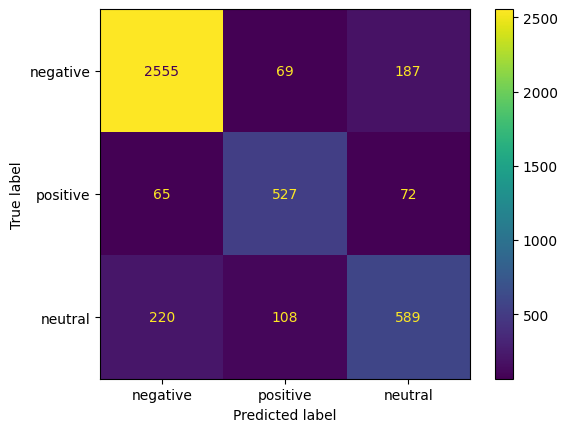

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp=ConfusionMatrixDisplay.from_predictions(split['test']['label'],test_pred,display_labels=['negative','positive','neutral'])

## Multiple Input Sentences

Applications:

* Answering Multiple Choice
* Chatbots with past context
* Question Answering

## Textual Entailment

* "Bob buys a car" => Entails => "Bob owns a car"
* "Bob purchased cheese" => doesn't entails => "Bos doesn't have cheese"

In [ ]:
!pip install transformers datasets torchinfo

### Importing Libs

In [ ]:
from datasets import load_dataset
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
#restart runtime after this
!pip install accelerate -U

In [ ]:
import torch

### Loading data

In [ ]:
raw_datasets = load_dataset("glue","rte")

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [ ]:
raw_datasets['train']['label'][:10]

[1, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [ ]:
raw_datasets['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [ ]:
raw_datasets['train']['sentence1'][:5]

['No Weapons of Mass Destruction Found in Iraq Yet.',
 'A place of sorrow, after Pope John Paul II died, became a place of celebration, as Roman Catholic faithful gathered in downtown Chicago to mark the installation of new Pope Benedict XVI.',
 'Herceptin was already approved to treat the sickest breast cancer patients, and the company said, Monday, it will discuss with federal regulators the possibility of prescribing the drug for more breast cancer patients.',
 'Judie Vivian, chief executive at ProMedica, a medical service company that helps sustain the 2-year-old Vietnam Heart Institute in Ho Chi Minh City (formerly Saigon), said that so far about 1,500 children have received treatment.',
 "A man is due in court later charged with the murder 26 years ago of a teenager whose case was the first to be featured on BBC One's Crimewatch. Colette Aram, 16, was walking to her boyfriend's house in Keyworth, Nottinghamshire, on 30 October 1983 when she disappeared. Her body was later found i

### Loading Tokenizer

In [ ]:
# Try albert-xxlarge-v2 or albert-base-v2
# They show good results on this
checkpoint = 'bert-base-cased'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
result = tokenizer(raw_datasets['train']['sentence1'][0]
          ,raw_datasets['train']['sentence2'][0])

result

{'input_ids': [101, 1302, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 6355, 119, 102, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
result.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
tokenizer.decode(result['input_ids'])

'[CLS] No Weapons of Mass Destruction Found in Iraq Yet. [SEP] Weapons of Mass Destruction Found in Iraq. [SEP]'

### Loading model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                           num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Defining TrainingArguments

In [ ]:
training_args = TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    logging_steps=150 # otherwise, 'no log" will appear under training loss since data is small
)

### Loading Metrics

In [ ]:
from datasets import load_metric

In [ ]:
metric = load_metric('glue','rte')

In [ ]:
metric.compute(predictions=[1,0,1],references=[1,0,0])

{'accuracy': 0.6666666666666666}

We only get accuracy, so we are going to include F1-score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits,axis=-1)
  acc = np.mean(predictions==labels)
  f1 = f1_score(labels,predictions)
  return {'accuracy':acc, 'f1-score':f1}

### Tokenizing Dataset

In [ ]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence1'],batch['sentence2'],truncation=True)

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_fn,
                                      batched=True,
                                    remove_columns=['idx'])

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
})

### Creating a Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

### Training Model

In [ ]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1-score
1,0.674400,0.628757,0.653430,0.555556
2,0.578500,0.634800,0.689531,0.635593
3,0.403400,0.687256,0.664260,0.586667
4,0.244500,1.168130,0.682310,0.633333
5,0.134700,1.360326,0.682310,0.630252


TrainOutput(global_step=780, training_loss=0.3941939876629756, metrics={'train_runtime': 414.5115, 'train_samples_per_second': 30.035, 'train_steps_per_second': 1.882, 'total_flos': 1081551909716760.0, 'train_loss': 0.3941939876629756, 'epoch': 5.0})

 ### Testing the Model

In [ ]:
trainer.save_model("textual-entailment")

In [ ]:
preds = trainer.predict(tokenized_datasets['validation'])

In [ ]:
predictions = np.argmax(preds[0],axis=-1)

In [ ]:
compute_metrics((preds[0],tokenized_datasets['validation']['label']))

{'accuracy': 0.6823104693140795, 'f1-score': 0.6302521008403361}

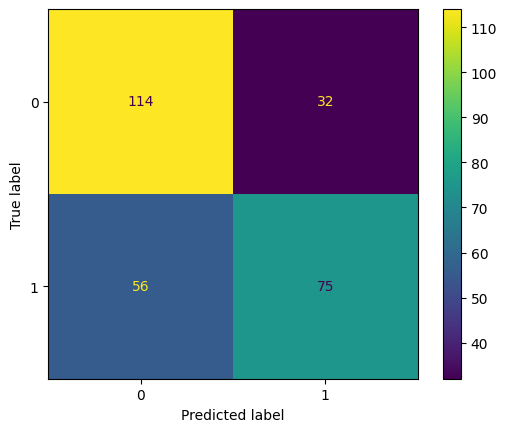

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(tokenized_datasets['validation']['label'],predictions)